<h1><center>Shopee : Marketing Analysis</center><h1>

## Project Team – Over30
- Donal Ngo         
- Lee Seng            
- Teerapong        
- Wilson Lum Kok Keong   
<br><br>

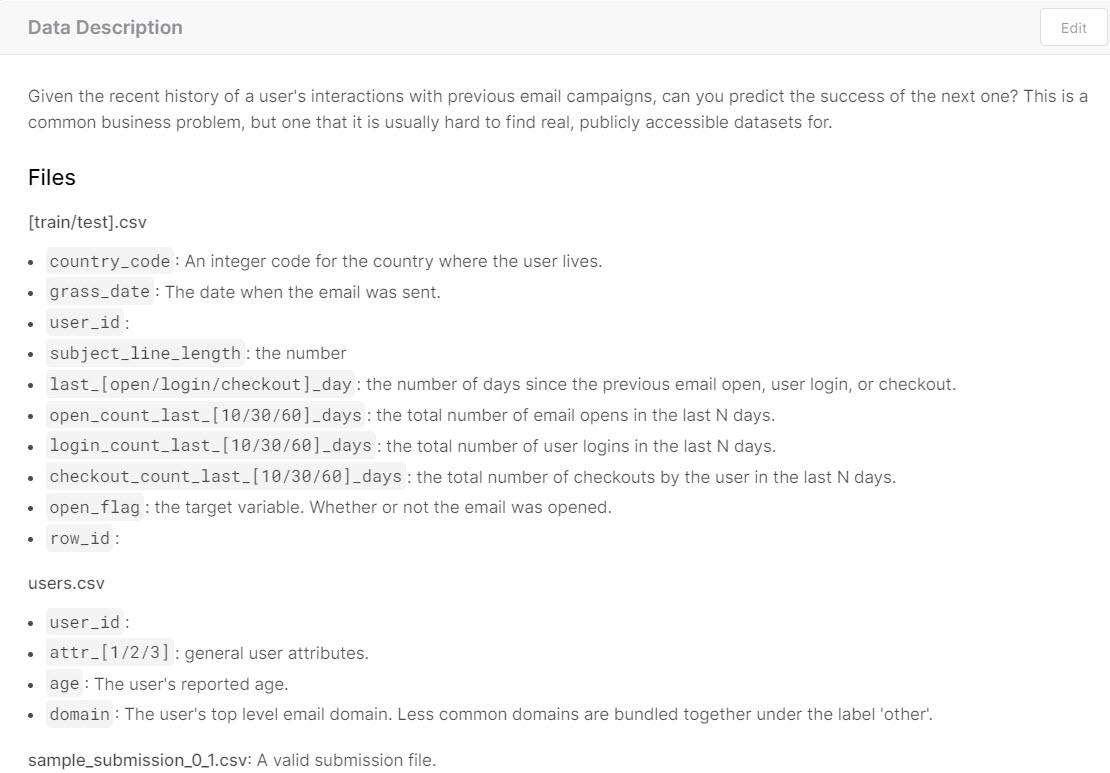

In [1]:
from IPython.display import Image
Image(filename='diagram/Data_description.JPG')

# PCA  & LDA Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## Reading in the dataset

Reading User data

In [2]:
#Read the csv file 
dataset2_df = pd.read_csv('data/test_dataset2a.csv')

In [3]:
dataset2_df

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,1.0,0.0,35,27,2,13,2,3,4,10,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.0,35,7,5,383,1,1,1,5,...,0,0,0,0,0,0,0,0,1,0
2,1.0,2.0,25,34,1,3,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2.0,36,63,5,5,0,0,0,43,...,1,0,0,1,0,0,0,0,0,0
4,1.0,0.0,23,6,5,54,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.0,0.0,53,1000,4,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55966,1.0,0.0,53,59,802,1207,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
55967,1.0,0.0,43,1000,7,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55968,1.0,0.0,43,5,5,6,2,5,14,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
dataset2_df.shape

(55970, 35)

In [5]:
dataset2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55970 entries, 0 to 55969
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attr_2                       55970 non-null  float64
 1   attr_3                       55970 non-null  float64
 2   subject_line_length          55970 non-null  int64  
 3   last_open_day                55970 non-null  int64  
 4   last_login_day               55970 non-null  int64  
 5   last_checkout_day            55970 non-null  int64  
 6   open_count_last_10_days      55970 non-null  int64  
 7   open_count_last_30_days      55970 non-null  int64  
 8   open_count_last_60_days      55970 non-null  int64  
 9   login_count_last_10_days     55970 non-null  int64  
 10  login_count_last_30_days     55970 non-null  int64  
 11  login_count_last_60_days     55970 non-null  int64  
 12  checkout_count_last_10_days  55970 non-null  int64  
 13  checkout_count_l

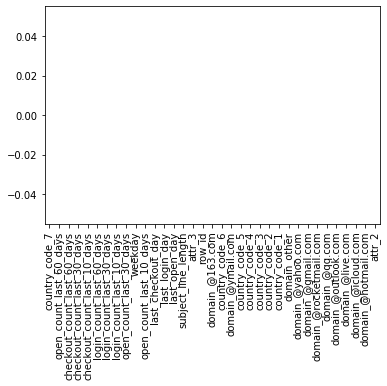

In [6]:
dataset2_df.isnull().mean().sort_values(ascending=False).plot(kind='bar')

In [7]:
dataset2_df.columns

Index(['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'row_id',
       'weekday', 'domain_@163.com', 'domain_@gmail.com',
       'domain_@hotmail.com', 'domain_@icloud.com', 'domain_@live.com',
       'domain_@outlook.com', 'domain_@qq.com', 'domain_@rocketmail.com',
       'domain_@yahoo.com', 'domain_@ymail.com', 'domain_other',
       'country_code_1', 'country_code_2', 'country_code_3', 'country_code_4',
       'country_code_5', 'country_code_6', 'country_code_7'],
      dtype='object')

### Apply standardscalar 

In [8]:
features =['attr_2', 'attr_3', 'subject_line_length', 'last_open_day',
       'last_login_day', 'last_checkout_day', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days', 'row_id',
       'weekday', 'domain_@163.com', 'domain_@gmail.com',
       'domain_@hotmail.com', 'domain_@icloud.com', 'domain_@live.com',
       'domain_@outlook.com', 'domain_@qq.com', 'domain_@rocketmail.com',
       'domain_@yahoo.com', 'domain_@ymail.com', 'domain_other',
       'country_code_1', 'country_code_2', 'country_code_3', 'country_code_4',
       'country_code_5', 'country_code_6', 'country_code_7']

In [9]:
from sklearn.externals import joblib
scaler_filename = "dataset2_scaler.save"
scaler = joblib.load(open(scaler_filename, 'rb'))


In [10]:
dataset2_df

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,1.0,0.0,35,27,2,13,2,3,4,10,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.0,35,7,5,383,1,1,1,5,...,0,0,0,0,0,0,0,0,1,0
2,1.0,2.0,25,34,1,3,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2.0,36,63,5,5,0,0,0,43,...,1,0,0,1,0,0,0,0,0,0
4,1.0,0.0,23,6,5,54,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.0,0.0,53,1000,4,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55966,1.0,0.0,53,59,802,1207,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
55967,1.0,0.0,43,1000,7,2000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55968,1.0,0.0,43,5,5,6,2,5,14,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
dataset_df_norow_id = dataset2_df.drop('row_id',axis = 1)

In [12]:
X_train_col_names = dataset_df_norow_id.columns

In [13]:
X_train_scaled = scaler.transform(dataset_df_norow_id)

In [14]:
X_train_scaled

array([[ 5.08374394e-02, -1.03888281e+00, -7.14045651e-01, ...,
        -3.10000228e-01,  4.31786575e+00, -2.00473359e-01],
       [ 5.08374394e-02, -1.03888281e+00, -7.14045651e-01, ...,
        -3.10000228e-01,  4.31786575e+00, -2.00473359e-01],
       [ 5.08374394e-02,  9.15216511e-01, -1.61138253e+00, ...,
         3.22580408e+00, -2.31595899e-01, -2.00473359e-01],
       ...,
       [ 5.08374394e-02, -1.03888281e+00,  3.82385328e-03, ...,
        -3.10000228e-01,  4.31786575e+00, -2.00473359e-01],
       [ 5.08374394e-02, -1.03888281e+00,  3.82385328e-03, ...,
        -3.10000228e-01,  4.31786575e+00, -2.00473359e-01],
       [ 5.08374394e-02, -1.03888281e+00,  9.01160734e-01, ...,
        -3.10000228e-01,  4.31786575e+00, -2.00473359e-01]])

In [15]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [16]:
X_train_scaled_df.columns = X_train_col_names

X_train_scaled_df.head()

,attr_2,attr_3,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7
0,0.050837,-1.038883,-0.714046,-0.261210,-0.148420,-0.600874,0.089045,-0.316465,-0.425837,0.106912,...,-0.28260,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473
1,0.050837,-1.038883,-0.714046,-0.339048,-0.139768,-0.143067,-0.319677,-0.632253,-0.702147,-0.271071,...,-0.28260,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,-0.310000,4.317866,-0.200473
2,0.050837,0.915217,-1.611383,-0.233967,-0.151305,-0.613247,-0.728400,-0.790147,-0.794251,0.333702,...,-0.28260,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473
3,0.050837,0.915217,-0.624312,-0.121103,-0.139768,-0.610772,-0.728400,-0.790147,-0.794251,2.601603,...,3.53857,-0.052586,-0.151201,1.481375,-0.510358,-0.463877,-0.379728,-0.310000,-0.231596,-0.200473
4,0.050837,-1.038883,-1.790850,-0.342939,-0.139768,-0.550144,-0.728400,-0.790147,-0.794251,-0.346668,...,-0.28260,-0.052586,-0.151201,-0.675049,-0.510358,-0.463877,-0.379728,3.225804,-0.231596,-0.200473


In [18]:
#*******************************************************************************
#                         Save train scaled data
#*******************************************************************************
# Create a new excel workbook
writer = pd.ExcelWriter('data/test_dataset2_scaled.xlsx', engine='xlsxwriter')

X_train_scaled_df.to_excel(writer, sheet_name='X_train_scaled', index = False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()